✅ Libraries Loaded Successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


None

C:\Users\akshi\AppData\Local\Temp\ipykernel_24896\2225341663.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="coolwarm")


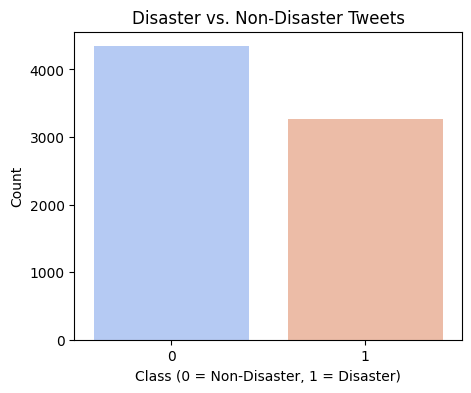

✅ Data Prepared for Model Training!
✅ Models Trained Successfully!
🔍 Naïve Bayes Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       874
           1       0.81      0.66      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



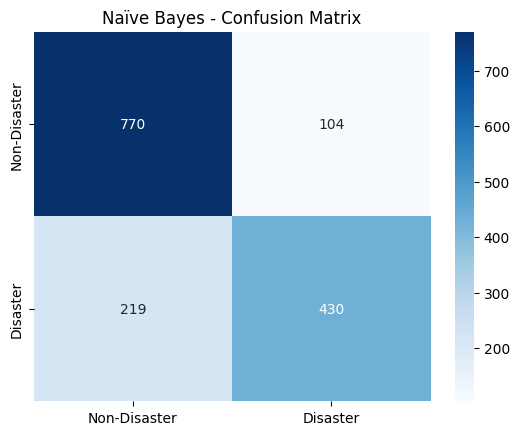

🔍 Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.82      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



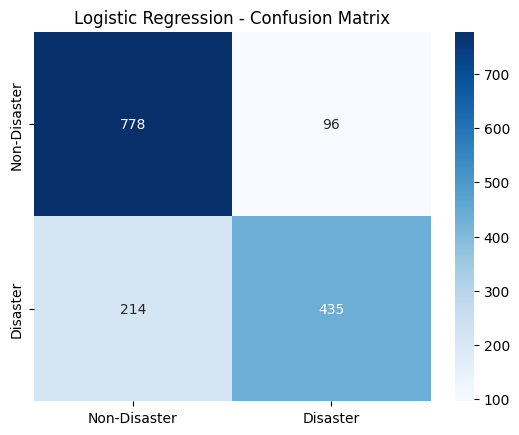

🔍 KNN Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       874
           1       0.52      0.58      0.55       649

    accuracy                           0.60      1523
   macro avg       0.59      0.59      0.59      1523
weighted avg       0.60      0.60      0.60      1523



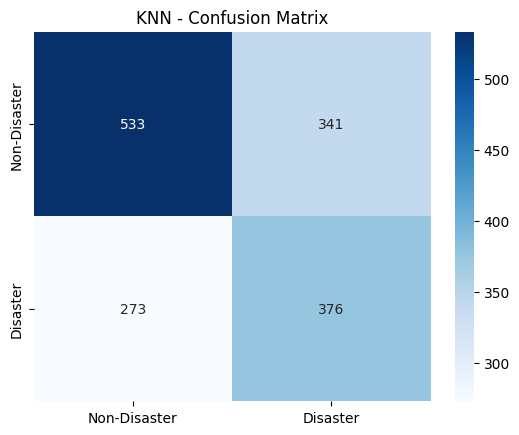

✅ All models and vectorizer saved successfully!


In [1]:
import pandas as pd
import numpy as np
import re
import string
import joblib
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

print("✅ Libraries Loaded Successfully!")

# Load dataset
df = pd.read_csv("../data/disaster_tweets_data(DS).csv")

# Show first few rows
display(df.head())

# Check dataset info
display(df.info())

# Check class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=df["target"], palette="coolwarm")
plt.title("Disaster vs. Non-Disaster Tweets")
plt.xlabel("Class (0 = Non-Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["clean_text"] = df["tweets"].apply(preprocess_text)

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["target"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data Prepared for Model Training!")

# Train Models
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

print("✅ Models Trained Successfully!")

# Evaluate Models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔍 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Disaster", "Disaster"], yticklabels=["Non-Disaster", "Disaster"])
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

evaluate_model(nb_model, "Naïve Bayes")
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(knn_model, "KNN")

# Save models
joblib.dump(nb_model, "../models/naive_bayes_model.pkl")
joblib.dump(lr_model, "../models/logistic_regression_model.pkl")
joblib.dump(knn_model, "../models/knn_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")

print("✅ All models and vectorizer saved successfully!")

In [2]:
# Bar chart for top keywords (if dataset contains a 'keyword' column)
if "keyword" in df.columns:
    top_keywords = df["keyword"].value_counts().head(10)

    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="coolwarm")
    plt.title("Top 10 Most Common Keywords in Tweets")
    plt.xlabel("Frequency")
    plt.ylabel("Keyword")
    plt.show()


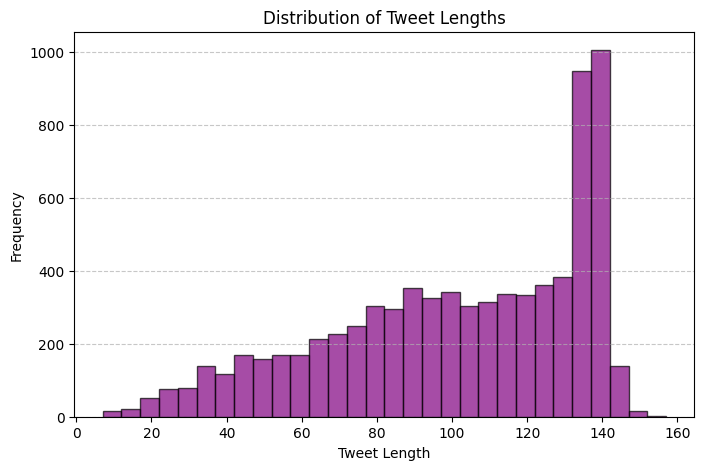

In [3]:
# Histogram for tweet lengths
df["tweet_length"] = df["tweets"].apply(len)

plt.figure(figsize=(8, 5))
plt.hist(df["tweet_length"], bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
